In [2]:
# 共通事前處理
# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 2344

In [ ]:
#載入資料、確認資料
df = pd.read_csv('day.csv', parse_dates=[1]) #利用parse_dates指定日期所在的行，並將其轉為datetime

display(df.info()) #確認資料型態

df = df.drop('instant', axis=1) #先把無用處的編號欄位刪除
columns = [
    '日期',  '季節',  '年份', '月份', '國定假日', '星期幾', '工作日', '天氣', 
    '氣溫', '體感溫度',  '濕度', '風速',
    '臨時用戶租借量', '註冊用戶租借量', '整體用戶租借量'
]
df.columns = columns
display(df.head())
display(df.tail()) #確認結尾資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

None

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


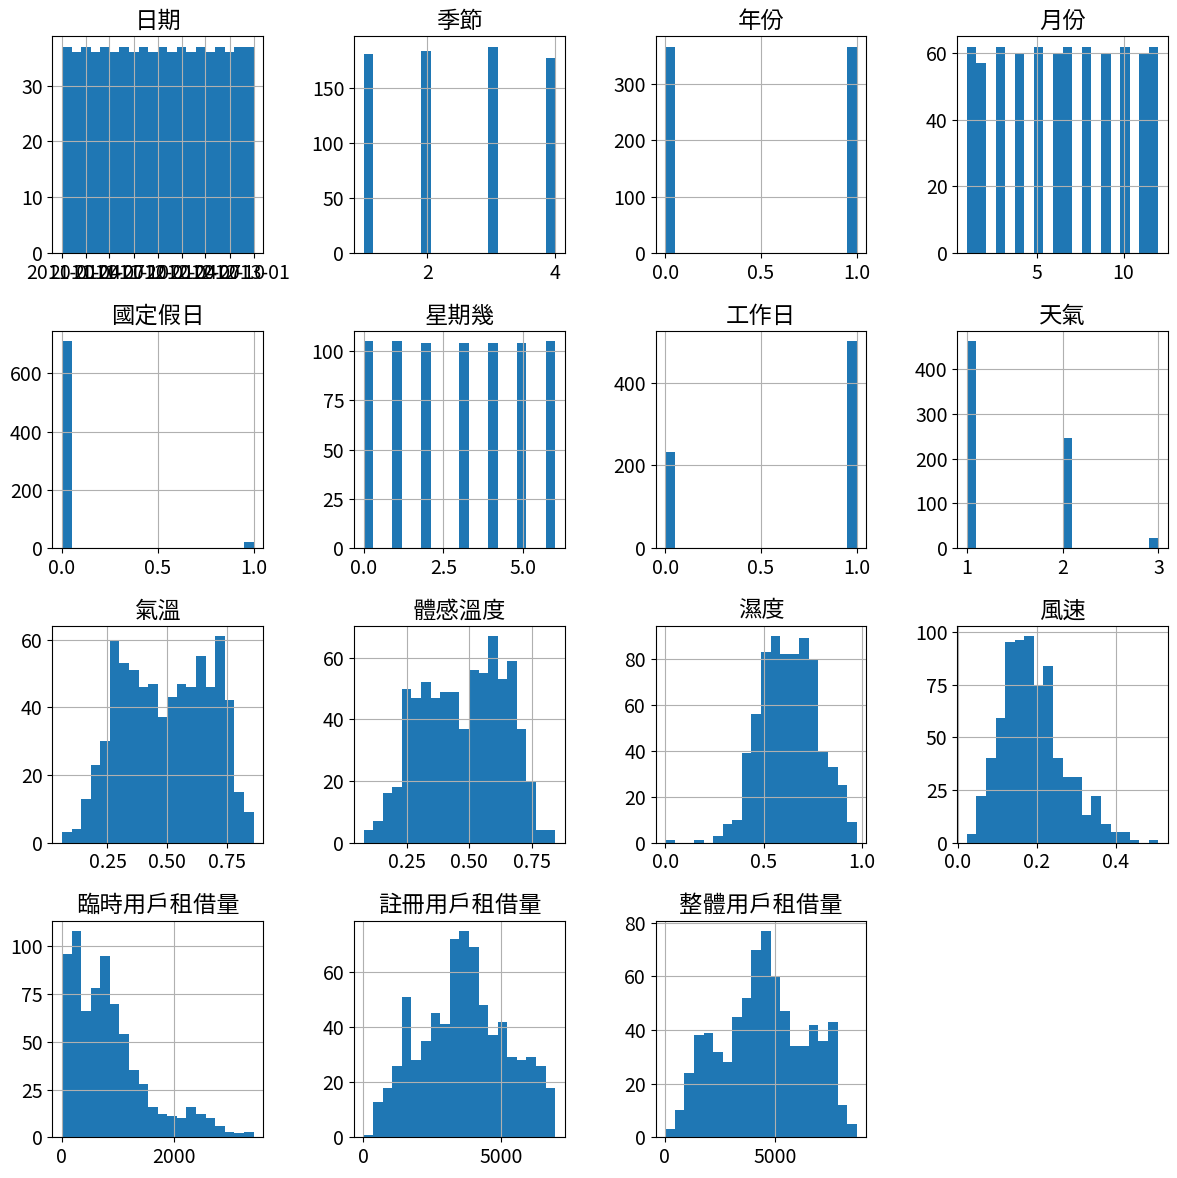

In [4]:
#繪製次數分佈圖，查看是否已標準化

#用來調整未來每一張圖形大小固定的方法，plt.figure()是指調整目前單一圖形大小
from pylab import rcParams
rcParams['figure.figsize'] = (12,12)

df.hist(bins=20) #直方圖的間格數(箱數)
plt.tight_layout()
plt.show()


In [5]:
#處理遺失值
df.isnull().sum()

日期         0
季節         0
年份         0
月份         0
國定假日       0
星期幾        0
工作日        0
天氣         0
氣溫         0
體感溫度       0
濕度         0
風速         0
臨時用戶租借量    0
註冊用戶租借量    0
整體用戶租借量    0
dtype: int64

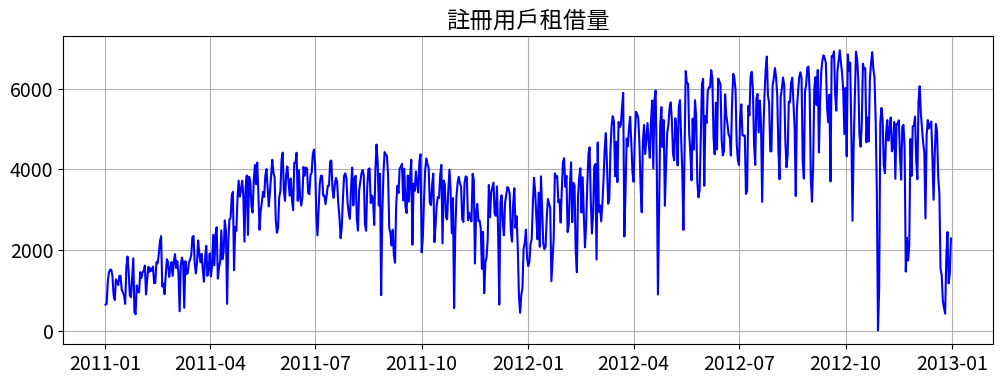

In [6]:
#繪製時間序列資料圖，因為要預測時間的[註冊用戶租借量]
plt.figure(figsize=(12,4))
plt.plot(df['日期'], df['註冊用戶租借量'], color='b')
plt.title('註冊用戶租借量')

plt.grid() #顯示網格
plt.show()

In [7]:
#先確認目標變數(租借量)、輸入變數、分割訓練資料與驗證資料
#日期分割成訓練與驗證，以20121101作為分界點，前22個月為訓練資料，後2個月為驗證資料
#分割輸入資料x與標準答案(目標變數y)

x = df.drop(['日期', '註冊用戶租借量', '臨時用戶租借量', '整體用戶租借量'], axis=1)
y = df['註冊用戶租借量'].values

In [8]:
#設定分割日
mday = pd.to_datetime('2012-11-1') #轉換為Timestamp

#建立訓練用的index與驗證用的index
train_index = df['日期'] < mday #日期早於mday的資料索引
test_index = df['日期'] >= mday #日期晚於mday的資料索引

#分割輸入資料
x_train, x_test = x[train_index], x[test_index]

#分割目標資料
y_train, y_test = y[train_index], y[test_index]

#分割日期資料(之後用於繪製圖形)
dates_test = df['日期'][test_index]

#確認分割後的結果(大小、邊界)
print(x_train.shape)
print(x_test.shape)
display(x_train.tail()) #訓練資料的邊界(尾)
display(x_test.head()) #驗證資料的邊界(頭)

(670, 11)
(61, 11)


,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速
665,4,1,10,0,6,0,2,0.5300,0.5151,0.7200,0.2357
666,4,1,10,0,0,0,2,0.4775,0.4678,0.6946,0.3980
667,4,1,10,0,1,1,3,0.4400,0.4394,0.8800,0.3582
668,4,1,10,0,2,1,2,0.3182,0.3099,0.8255,0.2130
669,4,1,10,0,3,1,2,0.3575,0.3611,0.6667,0.1667


,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速
670,4,1,11,0,4,1,2,0.3658,0.3699,0.5817,0.1573
671,4,1,11,0,5,1,1,0.3550,0.3560,0.5221,0.2662
672,4,1,11,0,6,0,2,0.3433,0.3238,0.4913,0.2705
673,4,1,11,0,0,0,1,0.3258,0.3295,0.5329,0.1791
674,4,1,11,0,1,1,1,0.3192,0.3081,0.4942,0.2363


In [9]:
#選擇演算法
#因為演算法很多，直接用XGBoost分類演算法的回歸版本，在回歸演算法中以效果優良著稱
from xgboost import XGBRegressor

#objective:squarederror是使用MSE均方誤差解決回歸問題,回歸問題中通常會用MSE當作損失函數。分類問題通常交叉熵(Cross entropy)當作損失函數
algorithm = XGBRegressor(objective ='reg:squarederror', random_state=random_seed)

In [ ]:
#訓練與預測
#訓練
algorithm.fit(x_train, y_train)
#預測
y_pred = algorithm.predict(x_test)

print(y_pred[:5]) #會輸出前5筆的預測租借數量


[4779.7373 5048.121  3801.5242 3460.2427 4053.6836]


In [11]:
#評估(使用R2決定係數評估)

#呼叫score函式
score = algorithm.score(x_test, y_test)

#計算R2值
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

print(f'score: {score:.4f}  r2_score: {r2_score:.4f}')


score: 0.4934  r2_score: 0.4934


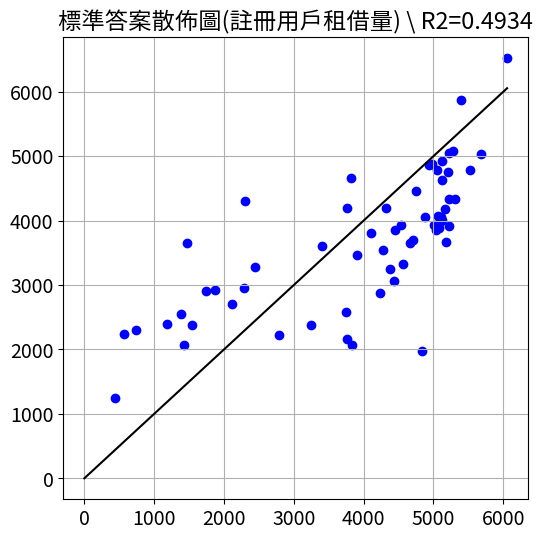

In [12]:
#評估(繪製散佈圖來評估)
plt.figure(figsize=(6,6))

y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), color='k')
plt.scatter(y_test, y_pred, c='b')
plt.title(f'標準答案散佈圖(註冊用戶租借量) \ R2={r2_score:.4f}')
plt.grid()
plt.show()

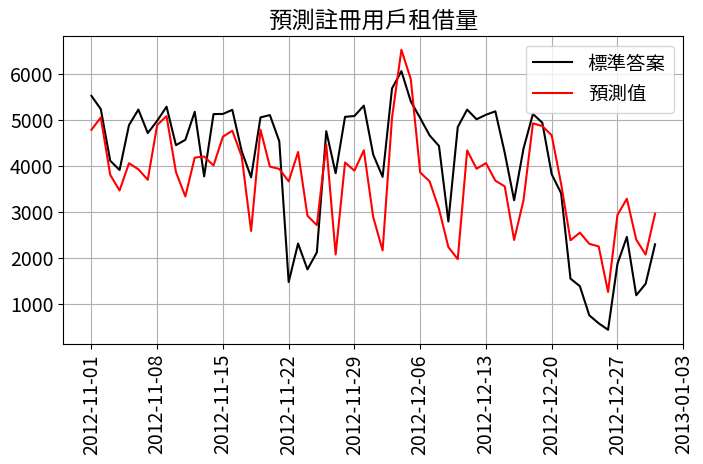

In [13]:
#繪製時間序列圖(註冊用戶租借量)
import matplotlib.dates as mdates
#建立畫布和子座標
fig, ax = plt.subplots(figsize=(8, 4))

#繪製圖形
ax.plot(dates_test, y_test, label='標準答案', c='k')
ax.plot(dates_test, y_pred, label='預測值', c='r')

#日期刻度間格，於每週四顯示日期
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#將日期刻度標籤文字選轉90度
ax.tick_params(axis='x', rotation=90)

#顯示網格、圖利、標題
ax.grid()
ax.legend()
ax.set_title('預測註冊用戶租借量')

plt.show()


pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None)
objs 必需。要合併的 Pandas 物件序列。  list 或 dict (包含 Series 或 DataFrame)
axis 合併方向。決定是堆疊還是並排。  0 (預設值，按列堆疊，增加行數，UNION ALL)  1 (按行並排，增加列數，JOIN)
join 處理非重疊欄位/索引的方式。  'outer' (預設值，保留所有欄位/索引，缺失處填 NaN)  'inner' (只保留所有物件共有的欄位/索引)
ignore_index 是否忽略原始索引。  False (預設值，保留原始物件的索引)  True (忽略原始索引，重新產生 0 到 N-1 的新索引)
keys 為每個輸入物件加上層級索引。  list (提供名稱列表)

In [14]:
#調整，因為月份、季節數值大小影響，讓模型差距較大，所以要one-hot編碼
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column, dtype=int)
    df = pd.concat([df.drop([column],axis=1),df_dummy], axis=1)
    return df

x2 = x.copy()
x2 = enc(x2, '月份')
x2 = enc(x2, '季節')

display(x2.tail())
display(x2.head())

,年份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,月份_1,月份_2,月份_3,月份_4,月份_5,月份_6,月份_7,月份_8,月份_9,月份_10,月份_11,月份_12,季節_1,季節_2,季節_3,季節_4
726,1,0,4,1,2,0.2542,0.2266,0.6529,0.3501,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
727,1,0,5,1,2,0.2533,0.2550,0.5900,0.1555,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
728,1,0,6,0,2,0.2533,0.2424,0.7529,0.1244,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
729,1,0,0,0,1,0.2558,0.2317,0.4833,0.3508,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
730,1,0,1,1,2,0.2158,0.2235,0.5775,0.1548,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


,年份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,月份_1,月份_2,月份_3,月份_4,月份_5,月份_6,月份_7,月份_8,月份_9,月份_10,月份_11,月份_12,季節_1,季節_2,季節_3,季節_4
0,0,0,6,0,2,0.3442,0.3636,0.8058,0.1604,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,2,0.3635,0.3537,0.6961,0.2485,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,1,0.1964,0.1894,0.4373,0.2483,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,2,1,1,0.2000,0.2121,0.5904,0.1603,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,3,1,1,0.2270,0.2293,0.4370,0.1869,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


[4407.4263 4613.675  3525.3262 3371.4912 3827.9282]
score: 0.4916  r2_score: 0.4916


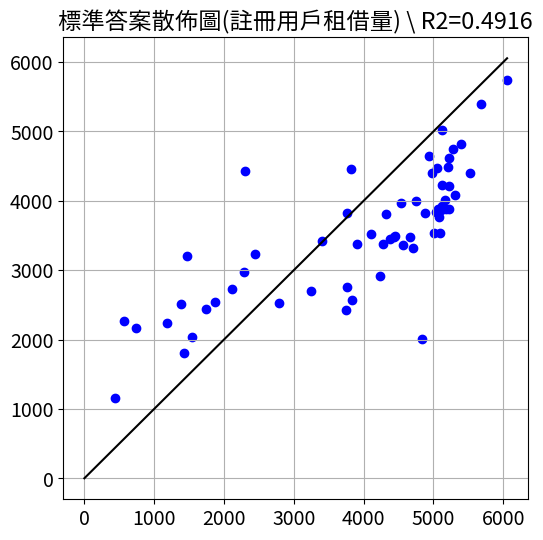

In [15]:
#分割輸入資料
x2_train, x2_test = x2[train_index], x2[test_index]

#選擇演算法
algorithm2 = XGBRegressor(objective ='reg:squarederror', random_state=random_seed)

#訓練
algorithm2.fit(x2_train, y_train)
#預測
y2_pred = algorithm2.predict(x2_test)

print(y2_pred[:5]) #會輸出前5筆的預測租借數量

#評估(使用R2決定係數評估)

#呼叫score函式
score2 = algorithm2.score(x2_test, y_test)

#計算R2值
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y2_pred)

print(f'score: {score2:.4f}  r2_score: {r2_score:.4f}')

#評估(繪製散佈圖來評估)
plt.figure(figsize=(6,6))

y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), color='k')
plt.scatter(y_test, y2_pred, c='b')
plt.title(f'標準答案散佈圖(註冊用戶租借量) \ R2={r2_score:.4f}')
plt.grid()
plt.show()

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


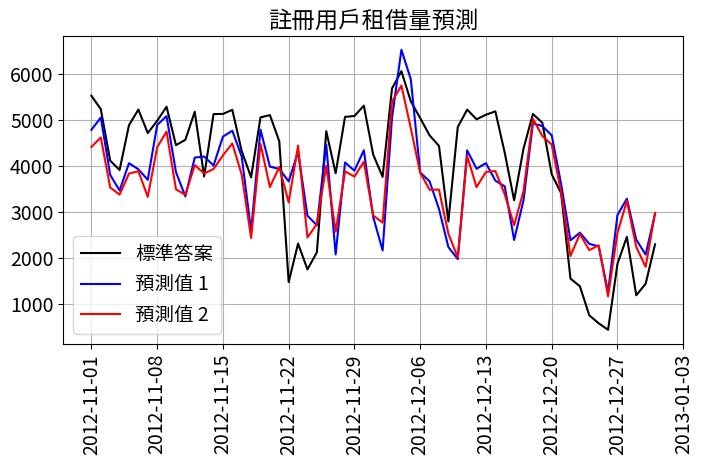

In [23]:
# 繪製時間序列圖（調整後 註冊用戶租借量）
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 繪製圖形
ax.plot(dates_test, y_test, label='標準答案', c='k')
ax.plot(dates_test, y_pred, label='預測值 1', c='b')
ax.plot(dates_test, y2_pred, label='預測值 2', c='r')

# 日期刻度間隔
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 日期格式
ax.tick_params(axis='x', rotation=90)

# 顯示網格等
ax.grid()
ax.legend()
ax.set_title('註冊用戶租借量預測')

# 輸出畫面
display(df.head())
plt.show()

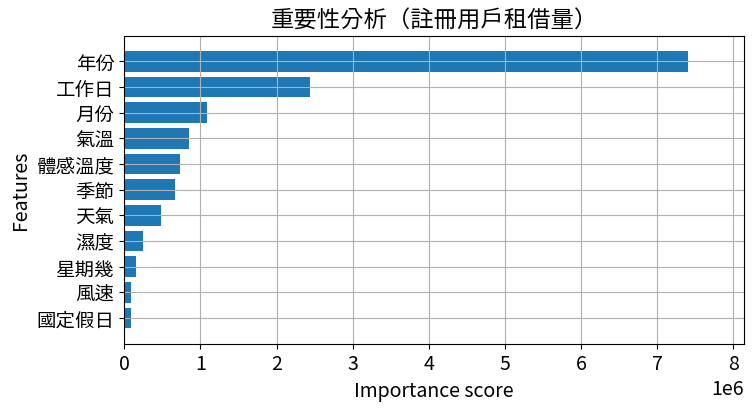

,年份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,月份_1,月份_2,月份_3,月份_4,月份_5,月份_6,月份_7,月份_8,月份_9,月份_10,月份_11,月份_12,季節_1,季節_2,季節_3,季節_4
0,0,0,6,0,2,0.3442,0.3636,0.8058,0.1604,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,2,0.3635,0.3537,0.6961,0.2485,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,1,0.1964,0.1894,0.4373,0.2483,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,2,1,1,0.2000,0.2121,0.5904,0.1603,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,3,1,1,0.2270,0.2293,0.4370,0.1869,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
# 對註冊用戶租借量進行重要性分析
import xgboost as xgb
fig, ax = plt.subplots(figsize=(8, 4))
xgb.plot_importance(algorithm, ax=ax, height=0.8,
    importance_type='gain', show_values=False,
    title='重要性分析（註冊用戶租借量）')
plt.show()
display(x2.head())